In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from simple_wta import WTAProblem, random_wta_factory
import spectral_clustering
import kmeans_clustering
import ahuja
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"] = ["serif"]
matplotlib.rcParams["font.serif"] = ["Times New Roman"]

c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


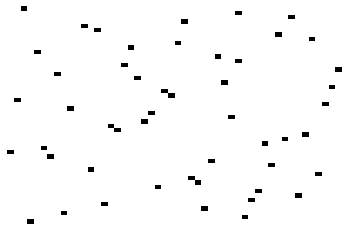

In [3]:
# heatmap of WTA problem data with assignments, shaded accordingly
rng = np.random.RandomState(seed=42)
n_w = 50; n_t = 50
prob = random_wta_factory(n_w,n_t,rng=rng)
anno_data = prob.v*prob.p
data1 = .25+np.zeros((n_w,n_t))
columns = ["T%d"%i for i in range(n_t)]
rows = ["W%d"%i for i in range(n_w)]
df = pd.DataFrame(data1,index=rows,columns=columns)
assignment = ahuja.optimize(prob)
for i in range(n_w):
    data1[i,assignment[i]] = 1

sns.heatmap(df,cbar=False,cmap='Greys', linecolor='black',linewidths=0,xticklabels=False,yticklabels=False)
plt.savefig("figures/ahuja_soln.png")

c:\Python39\lib\site-packages\sklearn\cluster\_spectral.py:658: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


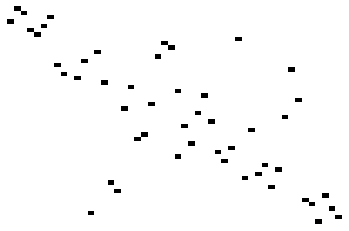

In [4]:
# now going to permute this solution by using the clustering method
probs, W, T = spectral_clustering.reduce_problem(prob, n_clusters=5, rng=rng)
# probs, W, T = kmeans_clustering.reduce_problem(prob, n_clusters=5, rng=rng)
lens = [len(row) for row in W]
data2 = data1.copy()
rows = np.concatenate(W)
cols = np.concatenate(T)
data2[:,:] = data2[rows,:]
data2[:,:] = data2[:,cols]
anno_data[:,:] = anno_data[rows,:]
anno_data[:,:] = anno_data[:,cols]

columns = ["T%d"%t for t in np.concatenate(T)]
rows = ["W%d"%w for w in np.concatenate(W)]
df = pd.DataFrame(data2,index=rows,columns=columns)
sns.heatmap(df,cbar=False,cmap='Greys', linecolor='black',linewidths=0,xticklabels=False,yticklabels=False)
plt.savefig("figures/ahuja_soln_diag.png")

c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)


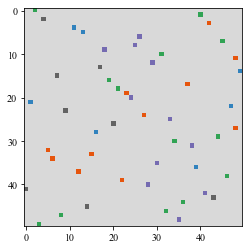

In [5]:
assignments = [ahuja.optimize(p) for p in probs]
colors = list(range(len(W)))
data3 = (len(W))*np.ones((n_w,n_t))
for i in range(len(W)):
    for j in range(len(W[i])):
        w = W[i][j]
        t = T[i][assignments[i][j]]
        data3[w,t] = colors[i]

# rows = np.concatenate(W)
# cols = np.concatenate(T)
# data3[:,:] = data3[rows,:]
# data3[:,:] = data3[:,cols]
# anno_data[:,:] = anno_data[rows,:]
# anno_data[:,:] = anno_data[:,cols]

# columns = ["T%d"%t for t in np.concatenate(T)]
# rows = ["W%d"%w for w in np.concatenate(W)]
# df2 = pd.DataFrame(data3,index=rows,columns=columns)
# sns.heatmap(df2,cbar=False,cmap='tab20c', linecolor='black',linewidths=0,xticklabels=False,yticklabels=False)
# plt.savefig("figures/cluster_soln.png")
plt.imshow(data3,cmap='tab20c')

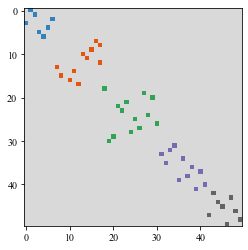

In [6]:
data4 = data3.copy()
rows = np.concatenate(W)
cols = np.concatenate(T)
data4[:,:] = data4[rows,:]
data4[:,:] = data4[:,cols]
plt.imshow(data4,cmap='tab20c')

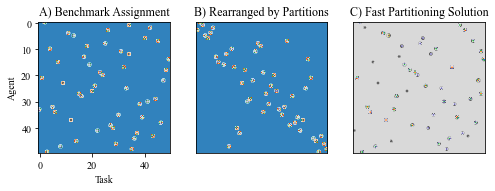

In [7]:
# aggregate figure
fig,axs = plt.subplots(1,3,figsize=(8,8/3))
axs[0].imshow(data1,cmap="tab20c")
axs[0].set_title("A) Benchmark Assignment")
axs[0].set_xlabel("Task")
axs[0].set_ylabel("Agent")
axs[1].imshow(data2,cmap="tab20c")
axs[1].set_title("B) Rearranged by Partitions")
axs[1].set_xticks([])
axs[1].set_yticks([])
# axs[1].set_xlabel("Tasks")
# axs[1].set_ylabel("Agents")
axs[2].imshow(data3,cmap="tab20c")
axs[2].set_title("C) Fast Partitioning Solution")
axs[2].set_xticks([])
axs[2].set_yticks([])
# axs[2].set_xlabel("Tasks")
# axs[2].set_ylabel("Agents")
plt.savefig("figures/solution_compare_matrixplot.png",dpi=1000)

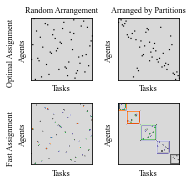

In [25]:
# an alternate hero figure made from these images
fig,axs = plt.subplots(2,2,figsize=(8/3,8/3))
axs[0,0].imshow(data1,cmap="Greys",vmin=0,vmax=1)
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].set_title("Random Arrangement",size="small")
axs[0,0].set_ylabel("Agents",fontsize="small",labelpad=1)
axs[0,0].set_xlabel("Tasks",fontsize="small",labelpad=1)
axs[1,1].set_yticks([])
# axs[0,0].ylabel("Optimal Solution")
axs[0,0].text(-15,55,"Optimal Assignment",wrap=True,rotation="vertical",size="small")
axs[0,1].imshow(data2,cmap="Greys",vmin=0,vmax=1)
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].set_ylabel("Agents",fontsize="small",labelpad=1)
axs[0,1].set_xlabel("Tasks",fontsize="small",labelpad=1)
axs[0,1].set_title("Arranged by Partitions",size="small")
axs[1,0].imshow(data3,cmap='tab20c')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].set_ylabel("Agents",fontsize="small",labelpad=1)
axs[1,0].set_xlabel("Tasks",fontsize="small",labelpad=1)
axs[1,0].text(-15,50,"Fast Assignment",wrap=True,rotation="vertical",size="small")


axs[1,1].imshow(data4,cmap='tab20c')
axs[1,1].set_xticks([])
axs[1,1].set_ylabel("Agents",fontsize="small",labelpad=1)
axs[1,1].set_xlabel("Tasks",fontsize="small",labelpad=1)


plt.tight_layout()
plt.savefig("foobar.png",dpi=1000)